**Econ 353: Money, Banking and Financial Institutions**  

**Project 1 on Time-Series Analysis**  

We are using the monthly prices of Swine

Data source: https://fred.stlouisfed.org/series/PPORKUSDM



**<span style="color:red;">Objective of the Project:</span>**  

1) Upload a Time-series data set  
2) Visualize the data and report what you find - is there a trend or sesaonal component to it  
3) Check the stationarity of the data and report results  
4) If the data has trend and /or seasonality, decompose the data into trend and/or seasonal component 
5) Visualize the components of the data
6) If the data has trend then de-trend the data
7) If the data has seasonal component then de-seasonalize the data
8) Visualize the de-seasonalized /de-trended data
9) Check stationarity of de-trended data and report results. Make sure the series the stationary before further analysis
10) Forecast using ARIMA modelling
11) Visualize the Forecast

The Notebook below is divided into 11 sections above each section how to complete each analysis, respectively. 

**<span style="color:red;">install necessary libraries if not installed</span>**  

In [1]:
#pip install pmdarima

You need to import certain libraries in python whioch you will require for plotting

In [2]:
# Import necessary libraries
import pandas as pd #Pandas is a popular data manipulation and analysis library for the Python programming language. It provides data structures for efficiently storing, analysing and manipulating large datasets
import numpy as np #NumPy is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays
import matplotlib.pyplot as plt # This library is used for plotting
from statsmodels.tsa.stattools import adfuller # this is for ststitical tests like carrying out unit root test, among others
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima # this is for ARIMA forecasting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# Load your time series data (replace 'your_data.csv' with your actual file or data source)
df = pd.read_csv('Swine_Prices.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Convert 'Value' to numeric format
#df['Prices'] = df['Prices'].str.replace(',', '').astype(int)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

In [4]:
print(df)

                Prices
Date                  
1990-01-01   93.147106
1990-02-01   80.003995
1990-03-01   79.910116
1990-04-01   99.643558
1990-05-01  115.678154
...                ...
2023-08-01   96.948261
2023-09-01   84.335500
2023-10-01   78.635455
2023-11-01   72.837619
2023-12-01   65.820500

[408 rows x 1 columns]


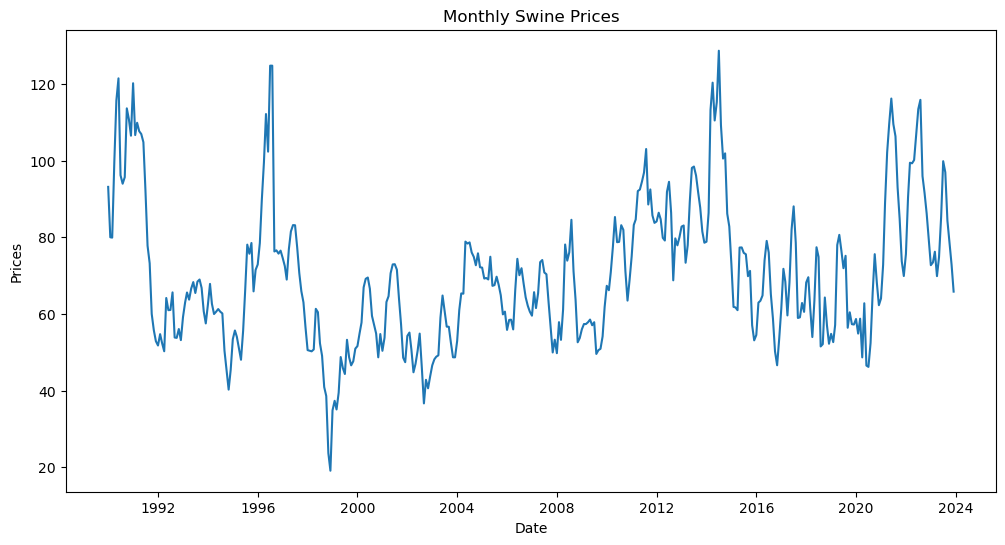

In [6]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'])
plt.title('Monthly Swine Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

The Augmented Dickey-Fuller (ADF) test is a statistical test for stationarity. The test produces an ADF statistic and a p-value. The null hypothesis of the test is that the time series has a unit root, which indicates non-stationarity. The alternative hypothesis is that the time series is stationary.

In [7]:
# Check for stationarity
def stationarity_test(timeseries):
    result = adfuller(df, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
stationarity_test(df['Prices'])

ADF Statistic: -4.517549516110054
p-value: 0.00018276997992539113
Critical Values: {'1%': -3.447014064067954, '5%': -2.8688850015516016, '10%': -2.5706826870693797}


Interpretation:

ADF Statistic: The ADF statistic is -1.3526. The more negative this statistic, the stronger the evidence against the null hypothesis. In this case, it's less negative than the critical values.

p-value: The p-value is 0.605. If the p-value is greater than a chosen significance level (e.g., 0.05), you fail to reject the null hypothesis. In this case, the p-value is greater than 0.05, suggesting that we do not have enough evidence to reject the null hypothesis.

Critical Values: These are the critical values at 1%, 5%, and 10% significance levels. The ADF statistic should be more negative than these critical values for us to reject the null hypothesis. In this case, the ADF statistic is not more negative than the critical values.
    
Conclusion:

Based on the ADF test results, we do not have enough evidence to reject the null hypothesis of non-stationarity. The time series data may not be stationary, and further steps such as differencing or other transformations may be needed to achieve stationarity.   

The seasonal_decompose function in statsmodels allows you to decompose a time series into its trend, seasonal, and residual components. The period parameter represents the number of observations per seasonal cycle.

In my case, since the data appears to be monthly, we can set the period parameter to 12 because there are 12 months in a year. If our data has a different frequency, adjust the period accordingly.

In [9]:
# De-compose for trend, seasonality, and residual
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)#adjust seasonal period as required
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

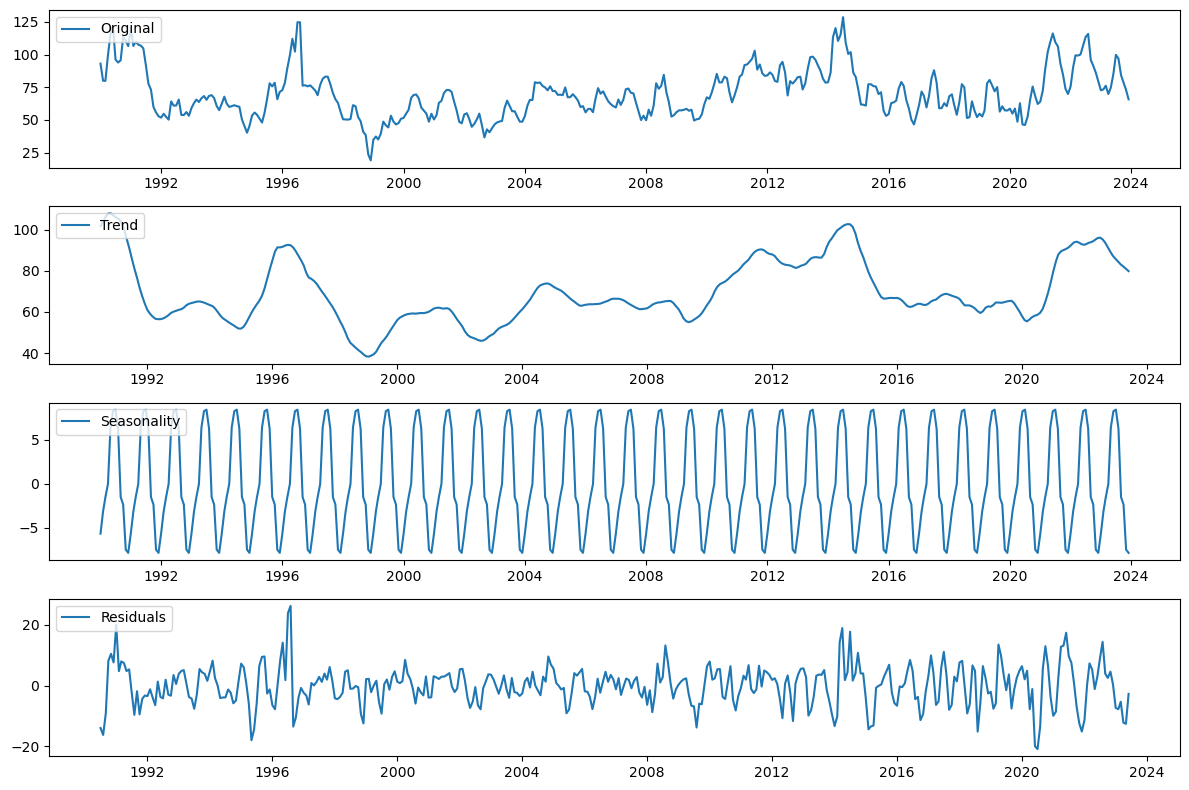

In [10]:
# Visualize components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Prices'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [11]:
# De-trend by subtracting trend
detrended = df['Prices'] - trend



In [12]:
# De-seasonalize by subtracting seasonal component
deseasonalized = df['Prices'] - seasonal



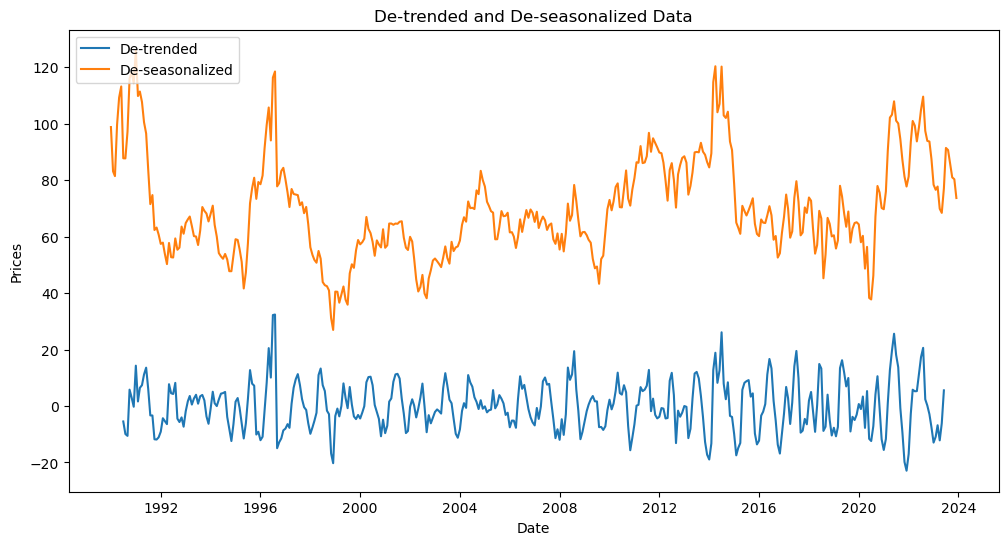

In [13]:
# Visualize de-trended and de-seasonalized data
plt.figure(figsize=(12, 6))
plt.plot(detrended, label='De-trended')
plt.plot(deseasonalized, label='De-seasonalized')
plt.legend(loc='upper left')
plt.title('De-trended and De-seasonalized Data')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()



In [14]:
# Check stationarity of de-trended data
stationarity_test(deseasonalized.dropna())



ADF Statistic: -4.517549516110054
p-value: 0.00018276997992539113
Critical Values: {'1%': -3.447014064067954, '5%': -2.8688850015516016, '10%': -2.5706826870693797}


In [15]:
# Check stationarity of de-trended data
stationarity_test(detrended.dropna())


ADF Statistic: -4.517549516110054
p-value: 0.00018276997992539113
Critical Values: {'1%': -3.447014064067954, '5%': -2.8688850015516016, '10%': -2.5706826870693797}


Based on the ADF test results, we do not have enough evidence to reject the null hypothesis of non-stationarity. The time series data may not be stationary, and further steps such as differencing or other transformations may be needed to achieve stationarity.   

In the provided code below, the auto_arima function from the pmdarima library is used to automatically find the best ARIMA model (p, d, q) for your time series data. This function performs a grid search over multiple combinations of p, d, and q values and selects the model with the lowest Akaike Information Criterion (AIC).

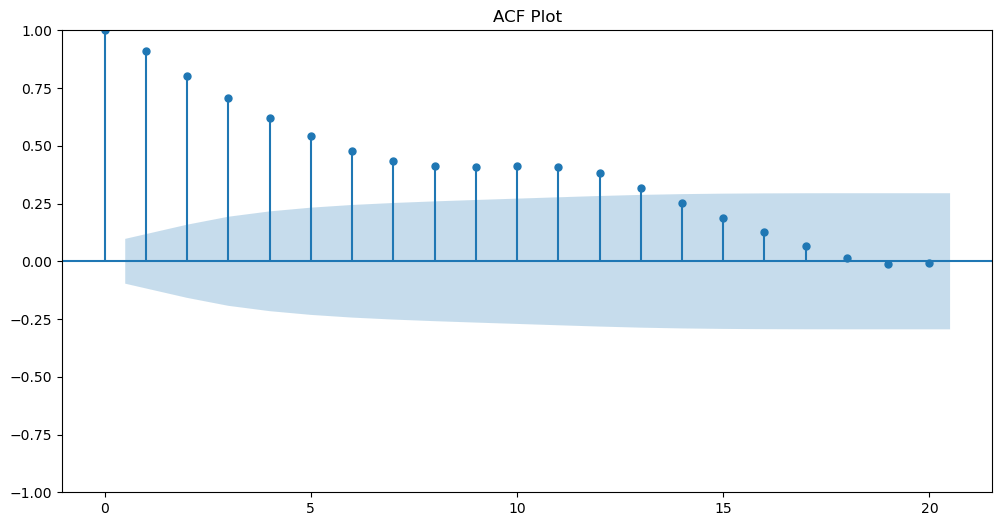

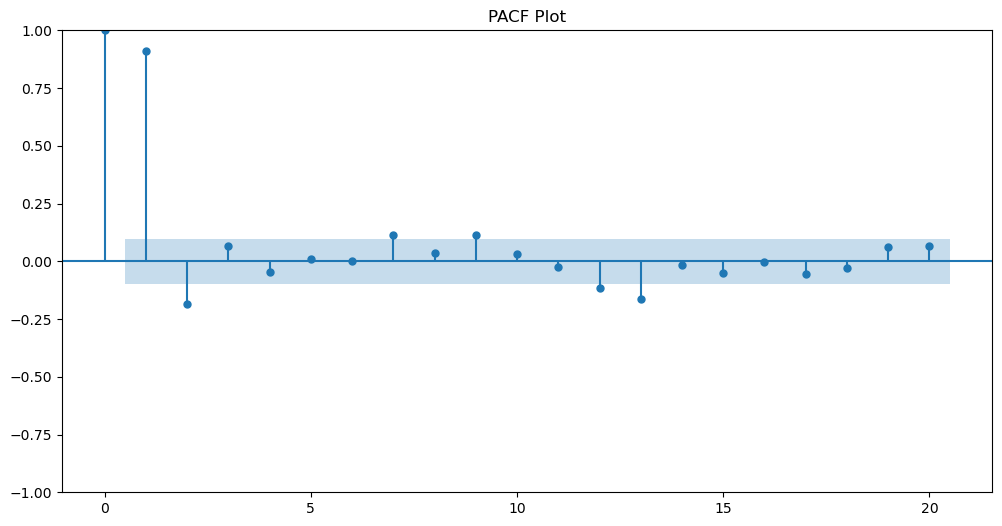

In [16]:
# ACF and PACF plots for determining ARIMA orders
plt.figure(figsize=(12, 6))
plot_acf(df['Prices'], lags=20, ax=plt.gca())
plt.title('ACF Plot')
plt.show()
plt.figure(figsize=(12, 6))
plot_pacf(df['Prices'], lags=20, ax=plt.gca())
plt.title('PACF Plot')
plt.show()

Fitting arima model (Method 1)

(2, 1, 0)
(2, 0, 0, 12)
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  408
Model:             SARIMAX(2, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1387.936
Date:                            Sun, 11 Feb 2024   AIC                           2785.872
Time:                                    12:18:52   BIC                           2805.916
Sample:                                01-01-1990   HQIC                          2793.804
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1285      0.049      2.644      0.008       0.033       0.224
ar.L2      

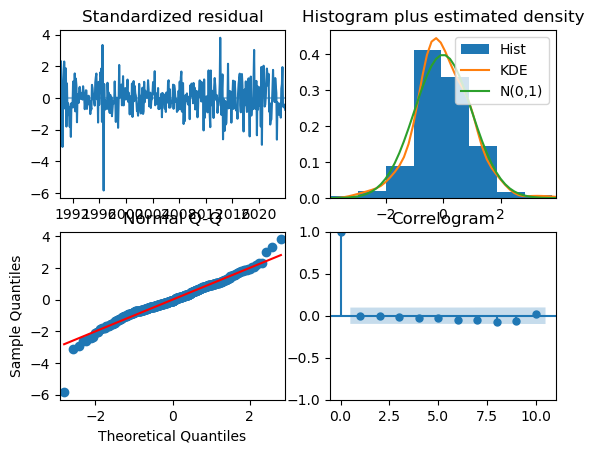

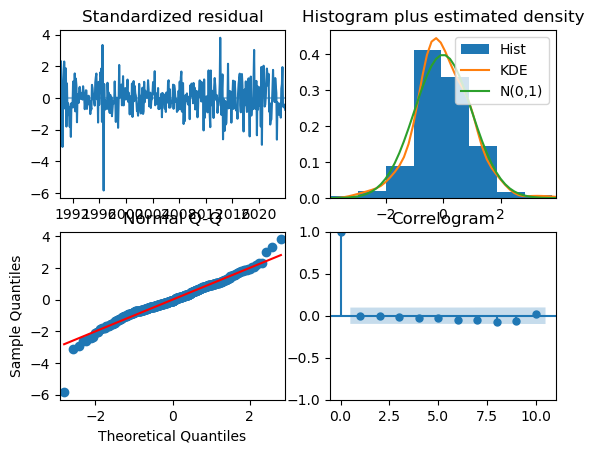

In [29]:
from pmdarima import auto_arima
import pandas as pd

# Assuming df is your time series dataframe with a datetime index and 'Prices' column
# Adjust the exogenous variables accordingly if needed

# Perform a grid search for the best SARIMAX model
model = auto_arima(df['Prices'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

# Display the best model's parameters
print(model.order)
print(model.seasonal_order)

# Fit the best model to the data
model.fit(df['Prices'])
print(model.summary())
model.plot_diagnostics()

In [36]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima

# Assuming df is your time series dataframe with a datetime index and 'Prices' column
# Adjust the exogenous variables accordingly if needed

# Assuming Prices_log_diff and model are already defined


# In-sample forecasting
in_sample_forecast = model.predict_in_sample()


# Out-of-sample forecasting
# Assuming you have future data in a DataFrame called df_future
n_periods = 10
forecast, conf_int = model.predict(steps=n_periods, return_conf_int=True)


# Print or use the forecasts as needed
print("In-sample forecast:")
print(in_sample_forecast)

print("\nOut-of-sample forecast:")
print(forecast)


In-sample forecast:
1990-01-01      0.000000
1990-02-01     93.147721
1990-03-01     78.549224
1990-04-01     82.024942
1990-05-01    102.194360
                 ...    
2023-08-01    100.209037
2023-09-01     88.657784
2023-10-01     81.681140
2023-11-01     76.451871
2023-12-01     71.286979
Freq: MS, Name: predicted_mean, Length: 408, dtype: float64

Out-of-sample forecast:
2024-01-01    65.588780
2024-02-01    69.232167
2024-03-01    71.466344
2024-04-01    70.323408
2024-05-01    71.220321
2024-06-01    74.149629
2024-07-01    77.599883
2024-08-01    77.586173
2024-09-01    71.963028
2024-10-01    70.266819
Freq: MS, dtype: float64


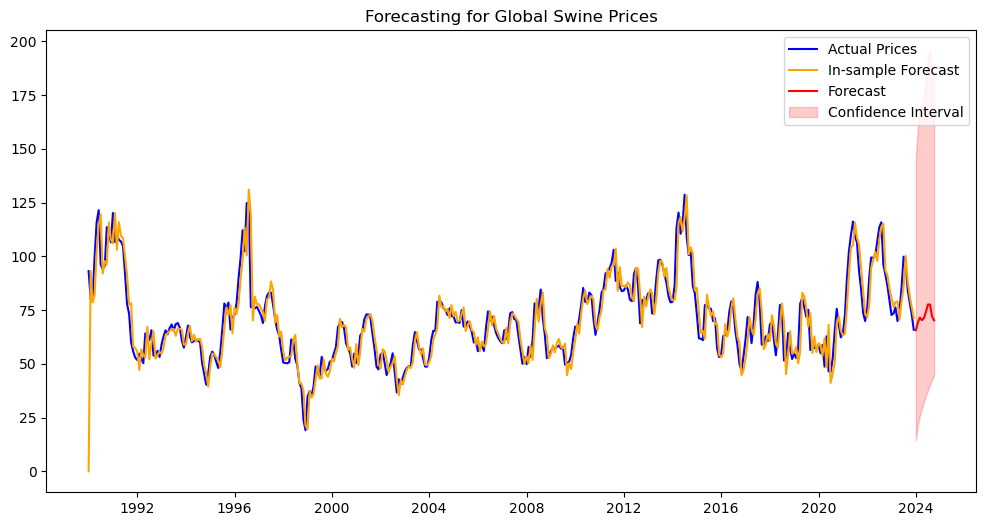

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima


# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df['Prices'], label='Actual Prices', color='blue')

# Plot the in-sample forecast
plt.plot(df.index, in_sample_forecast, label='In-sample Forecast', color='orange')

# Plot the out-of-sample forecast
forecast_index = pd.date_range(start=df.index[-1], periods=n_periods + 1, freq='MS')[1:]


plt.plot(forecast_index, forecast, label='Forecast', color='red')
# Plot the confidence interval
lower_bound = forecast - conf_int[:, 0]
upper_bound = forecast + conf_int[:, 1]
plt.fill_between(forecast_index, lower_bound, upper_bound, color='red', alpha=0.2, label='Confidence Interval')



plt.title('Forecasting for Global Swine Prices')
plt.legend()
plt.show()